<a href="https://colab.research.google.com/github/packetech/baracuda/blob/master/Face_Detection_Questions_Notebook_final_Corrections.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instructions
- Some parts of the code are already done for you
- You need to execute all the cells
- You need to add the code where ever you see `"#### Add your code here ####"`
- Marks are mentioned along with the cells

# Face detection
Task is to predict the boundaries(mask) around the face in a given image.

## Dataset
Faces in images marked with bounding boxes. Have around 500 images with around 1100 faces manually tagged via bounding box.

### Mount Google drive if you are using google colab
- We recommend using Google Colab as you can face memory issues and longer runtimes while running on local

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


### Change current working directory to project folder (1 mark)

In [2]:

import os
#### Add your code here ####
os.chdir('/content/drive/My Drive/AIML/Face Detection AIML project')
!pwd

/content/drive/My Drive/AIML/Face Detection AIML project


### Load the "images.npy" file (1 mark)
- This file contains images with details of bounding boxes

In [0]:
import numpy as np
data = np.load('images.npy', allow_pickle=True,) #### Add your code here ####

### Check one sample from the loaded "images.npy" file  (1 mark)

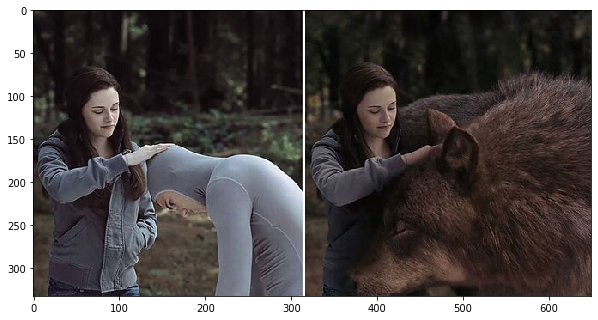

In [4]:
#### Add your code here ####
from matplotlib import pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(10,10))  # width, height in inches

for i in range(1):
    sub = fig.add_subplot(1, 1, i + 1)
    sub.imshow(data[0,i], interpolation='nearest')

### Set image dimensions   (1 mark)
- Initialize image height, image width with value: 224 

In [0]:
IMAGE_WIDTH = 224 #### Add your code here ####
IMAGE_HEIGHT = 224 #### Add your code here ####

### Create features and labels
- Here feature is the image
- The label is the mask
- Images will be stored in "X_train" array
- Masks will be stored in "masks" array

In [0]:
import cv2
from tensorflow.keras.applications.mobilenet import preprocess_input

masks = np.zeros((int(data.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH))
X_train = np.zeros((int(data.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH, 3))
for index in range(data.shape[0]):
    img = data[index][0]
    img = cv2.resize(img, dsize=(IMAGE_HEIGHT, IMAGE_WIDTH), interpolation=cv2.INTER_CUBIC)
    try:
      img = img[:, :, :3]
    except:
      continue
    X_train[index] = preprocess_input(np.array(img, dtype=np.float32))
    for i in data[index][1]:
        x1 = int(i["points"][0]['x'] * IMAGE_WIDTH)
        x2 = int(i["points"][1]['x'] * IMAGE_WIDTH)
        y1 = int(i["points"][0]['y'] * IMAGE_HEIGHT)
        y2 = int(i["points"][1]['y'] * IMAGE_HEIGHT)
        masks[index][y1:y2, x1:x2] = 1

### Print the shape of X_train and mask array  (1 mark)

In [7]:
X_train.shape #### Add your code here ####

(409, 224, 224, 3)

In [8]:
masks.shape #### Add your code here ####

(409, 224, 224)

### Print a sample image and image array

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[[-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  ...
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]]

 [[-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  ...
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]]

 [[-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  ...
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]]

 ...

 [[-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  ...
  [-0.96862745 -0.96862745 -0.96862745]
  [-0.96078432 -0.96078432 -0.96078432]
  [-0.96078432 -0.96078432 -0.96078432]]

 [

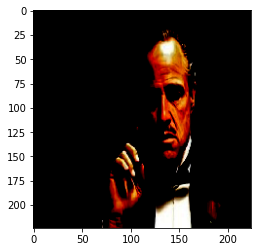

In [9]:
from matplotlib import pyplot
n = 10
print(X_train[n])
pyplot.imshow(X_train[n])

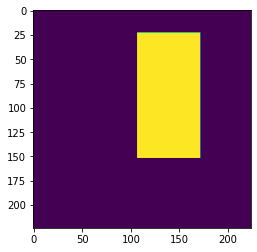

In [10]:
pyplot.imshow(masks[n])

## Create the model (10 marks)
- Add MobileNet as model with below parameter values
  - input_shape: IMAGE_HEIGHT, IMAGE_WIDTH, 3
  - include_top: False
  - alpha: 1.0
  - weights: "imagenet"
- Add UNET architecture layers
  - This is the trickiest part of the project, you need to research and implement it correctly

In [0]:
# SETTINGS

ALPHA = 1 # Width hyper parameter for MobileNet (0.25, 0.5, 0.75, 1.0). Higher width means more accurate but slower

HEIGHT_CELLS = 224
WIDTH_CELLS = 224

CELL_WIDTH = IMAGE_WIDTH / WIDTH_CELLS
CELL_HEIGHT = IMAGE_HEIGHT / HEIGHT_CELLS


PATIENCE = 10


In [0]:
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.layers import Concatenate, UpSampling2D, Conv2D, Reshape
from tensorflow.keras.models import Model


def create_model(trainable=True):
    model = MobileNet(input_shape=( IMAGE_HEIGHT, IMAGE_WIDTH, 3), include_top=False, alpha=ALPHA, weights="imagenet")#### Add your code here ####
    for layer in model.layers:
        layer.trainable = trainable

        # Add all the UNET layers here
    #### Add your code here #### 


    
    block4 = model.get_layer("conv_pw_1").output
    block0 = model.get_layer("conv_pw_3").output
    block1 = model.get_layer("conv_pw_5_relu").output
    block2 = model.get_layer("conv_pw_11_relu").output
    block3 = model.get_layer("conv_pw_13_relu").output

    x = Concatenate()([UpSampling2D()(block3), block2]) # to get 14x14 image size
    x = Concatenate()([UpSampling2D()(x), block1]) # to get 28x28 image size
    x = Concatenate()([UpSampling2D()(x), block0]) # to get 56x56 image size
    x = Concatenate()([UpSampling2D()(x), block4]) # to get 112x112 image size
    x = UpSampling2D()(x) # to get back 224x224 image size

    x = Conv2D(1, kernel_size=1, activation="sigmoid")(x)
    x = Reshape((HEIGHT_CELLS, WIDTH_CELLS))(x)
    

    return Model(inputs=model.input, outputs=x) #### Add your code here ####

### Call the create_model function

In [13]:
# Give trainable=False as argument, if you want to freeze lower layers for fast training (but low accuracy)
model = create_model()

# Print summary
model.summary()

17227776/17225924 [==============================] - 0s 0us/step
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 32) 864         conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 32) 128         conv1[0][0]                      
_____________________________

### Define dice coefficient function (5 marks)
- Create a function to calculate dice coefficient


In [0]:
def dice_coefficient(y_true, y_pred):
    #### Add your code here ####
    numerator = 2 * tf.reduce_sum(y_true * y_pred)
    denominator = tf.reduce_sum(y_true + y_pred)
    return numerator / (denominator + tf.keras.backend.epsilon()) #### Add your code here ####

### Define loss

In [0]:
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.backend import log, epsilon
def loss(y_true, y_pred):
    return binary_crossentropy(y_true, y_pred) - log(dice_coefficient(y_true, y_pred) + epsilon())

### Compile the model (2 marks)
- Complie the model using below parameters
  - loss: use the loss function defined above
  - optimizers: use Adam optimizer
  - metrics: use dice_coefficient function defined above

In [0]:
#### Add your code here ####
from tensorflow.keras.optimizers import Adam
optimizer = Adam(lr=1e-4, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss=loss, optimizer=optimizer, metrics=[dice_coefficient])

### Define checkpoint and earlystopping

In [17]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
checkpoint = ModelCheckpoint("model-{loss:.2f}.h5", monitor="loss", verbose=1, save_best_only=True,
                             save_weights_only=True, mode="min", period=1)
stop = EarlyStopping(monitor="loss", patience=5, mode="min")
reduce_lr = ReduceLROnPlateau(monitor="loss", factor=0.2, patience=5, min_lr=1e-6, verbose=1, mode="min")

### Fit the model (2 marks)
- Fit the model using below parameters
  - epochs: you can decide
  - batch_size: 1
  - callbacks: checkpoint, reduce_lr, stop

In [18]:
#### Add your code here ####
import tensorflow as tf

EPOCHS = 10
BATCH_SIZE = 1
THREADS = 1

import cv2
from PIL import Image

#masks = cv2.resize(masks, (28, 28))
#img = img.resize((IMAGE_WIDTH, IMAGE_HEIGHT))

# splitting X_train set about 70% : 30% into X (train set) and y(test set)
#X_train2 = X_train[:408,:,:,:]
#X = X_train2[:204,:,:,:]
#y = X_train2[204:,:,:,:]

from sklearn.model_selection import train_test_split

# Split into train and validation
trainX, testX, trainy, testy = train_test_split(X_train, masks, test_size=0.30, random_state=1)

#trainX = cv2.resize(trainX, (28, 28))
#testX = cv2.resize(testX, (28, 28))
#trainy = cv2.resize(trainy, (28, 28))
#testy = cv2.resize(testy, (28, 28))

model.fit(trainX, 
          trainy, 
          batch_size=BATCH_SIZE, 
          epochs=EPOCHS, 
          verbose=1, 
          callbacks=[checkpoint, reduce_lr, stop], 
          validation_data=(testX,testy), 
          shuffle=True, 
          workers=THREADS, 
          use_multiprocessing=True)

# model.fit(trainX, trainy, validation_data=(testX,testy), callbacks=[monitor], batch_size=16)

Epoch 1/10
285/286 [============================>.] - ETA: 0s - loss: 1.3265 - dice_coefficient: 0.4398
Epoch 00001: loss improved from inf to 1.32446, saving model to model-1.32.h5
286/286 [==============================] - 12s 42ms/step - loss: 1.3245 - dice_coefficient: 0.4402 - val_loss: 1.2736 - val_dice_coefficient: 0.4938 - lr: 1.0000e-04
Epoch 2/10
285/286 [============================>.] - ETA: 0s - loss: 0.7741 - dice_coefficient: 0.6091
Epoch 00002: loss improved from 1.32446 to 0.77550, saving model to model-0.78.h5
286/286 [==============================] - 13s 46ms/step - loss: 0.7755 - dice_coefficient: 0.6089 - val_loss: 1.2627 - val_dice_coefficient: 0.4944 - lr: 1.0000e-04
Epoch 3/10
285/286 [============================>.] - ETA: 0s - loss: 0.5972 - dice_coefficient: 0.6734
Epoch 00003: loss improved from 0.77550 to 0.59608, saving model to model-0.60.h5
286/286 [==============================] - 13s 44ms/step - loss: 0.5961 - dice_coefficient: 0.6738 - val_loss: 1.2

### Get the predicted mask for a sample image   (3 marks)

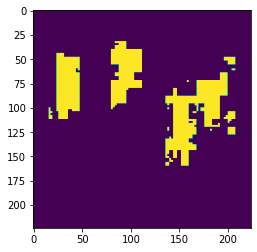

In [64]:
n = 141
sample_image = X_train[n]


#### Add your code here ####

WEIGHTS_FILE = "model-0.20.h5"
THRESHOLD = 0.8
EPSILON = 0.02

model = create_model()
model.load_weights(WEIGHTS_FILE)

from keras.preprocessing.image import save_img
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array


# save the image with a new filename
save_img('sample_image.jpg', sample_image)


filename = 'sample_image.jpg'
unscaled = cv2.imread(filename)
image = cv2.resize(unscaled, (IMAGE_WIDTH, IMAGE_HEIGHT))
feat_scaled = preprocess_input(np.array(image, dtype=np.float32))

pred_mask = cv2.resize(1.0*(model.predict(x=np.array([feat_scaled]))[0] > 0.5), (IMAGE_WIDTH,IMAGE_HEIGHT))


plt.imshow(pred_mask)



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


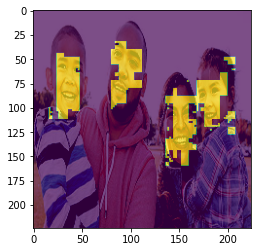

In [65]:
filename = 'sample_image.jpg'
unscaled = cv2.imread(filename)
image = cv2.resize(unscaled, (IMAGE_WIDTH, IMAGE_HEIGHT))
feat_scaled = preprocess_input(np.array(image, dtype=np.float32))

pred_mask = cv2.resize(1.0*(model.predict(x=np.array([feat_scaled]))[0] > 0.5), (IMAGE_WIDTH,IMAGE_HEIGHT))

plt.imshow(sample_image)
plt.imshow(pred_mask, alpha=0.7)

### Impose the mask on the image (3 marks)

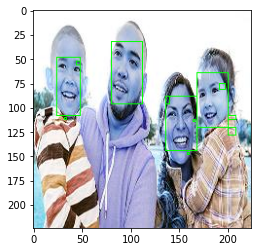

In [66]:
#### Add your code here ####
filename = 'sample_image.jpg'

unscaled = cv2.imread(filename)
image = cv2.resize(unscaled, (IMAGE_WIDTH, IMAGE_HEIGHT))
feat_scaled = preprocess_input(np.array(image, dtype=np.float32))

region = model.predict(x=np.array([feat_scaled]))[0]

output = np.zeros(unscaled.shape[:2], dtype=np.uint8)
for i in range(region.shape[1]):
    for j in range(region.shape[0]):
        if region[i][j] > THRESHOLD:
            x = int(CELL_WIDTH * j * unscaled.shape[1] / IMAGE_WIDTH)
            y = int(CELL_HEIGHT * i * unscaled.shape[0] / IMAGE_HEIGHT)
            x2 = int(CELL_WIDTH * (j + 1) * unscaled.shape[1] / IMAGE_WIDTH)
            y2 = int(CELL_HEIGHT * (i + 1) * unscaled.shape[0] / IMAGE_HEIGHT)
            #cv2.rectangle(unscaled, (x, y), (x2, y2), (0, 255, 0), 1)

            output[y:y2,x:x2] = 1

contours, hierarchy  = cv2.findContours(output, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
for cnt in contours:
    approx = cv2.approxPolyDP(cnt, EPSILON * cv2.arcLength(cnt, True), True)
    x, y, w, h = cv2.boundingRect(approx)
    cv2.rectangle(unscaled, (x, y), (x + w, y + h), (0, 255, 0), 1)

plt.imshow(unscaled)